### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Business).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data.

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score, recall_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
from pandas import DataFrame, Series
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('../content/bank2.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data.info

<bound method DataFrame.info of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  dura

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data=data.rename(columns={'y': 'signup'})

In [ ]:
data['education']=data['education'].replace(['primary', 'secondary', 'tertiary'], ['elementry', 'high school', 'university'])

In [ ]:
data.age.value_counts()

34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: age, Length: 67, dtype: int64

In [ ]:
data.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [ ]:
data.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [ ]:
data.education.value_counts()

high school    2306
university     1350
elementry       678
unknown         187
Name: education, dtype: int64

In [ ]:
data.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [ ]:
data.month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [ ]:
data.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [ ]:
data.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [ ]:
data.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [ ]:
data.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [ ]:
data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [ ]:
#import datetime
#data['monthnum'] = data['month'] + '-' + data['day'].astype(str)
#data['monthnum']=pd.to_datetime(data['monthnum'], format='%m-%d', errors='ignore')
from datetime import datetime
tmp=[]
for i in range(0, 4521):
      tmp.append(datetime.strptime(data['month'][i], '%b').month)
data=data.assign(monthnum = tmp)

In [ ]:
tmp2=[]
for i in range(0, 4521):
      if data.signup[i]=='yes':
        tmp2.append(int(1))
      else:
        tmp2.append(int(0))
data=data.assign(signup2 = tmp2)

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,monthnum
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,6.166777
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,2.378380
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,5.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,6.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,8.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,12.000000


In [ ]:
data.monthnum.value_counts()

5     1398
7      706
8      633
6      531
11     389
4      293
2      222
1      148
10      80
9       52
3       49
12      20
Name: monthnum, dtype: int64

In [ ]:
data.signup.value_counts()

no     4000
yes     521
Name: signup, dtype: int64

In [ ]:
data.signup2.value_counts()

0    4000
1     521
Name: signup2, dtype: int64

<Axes: xlabel='age', ylabel='campaign'>

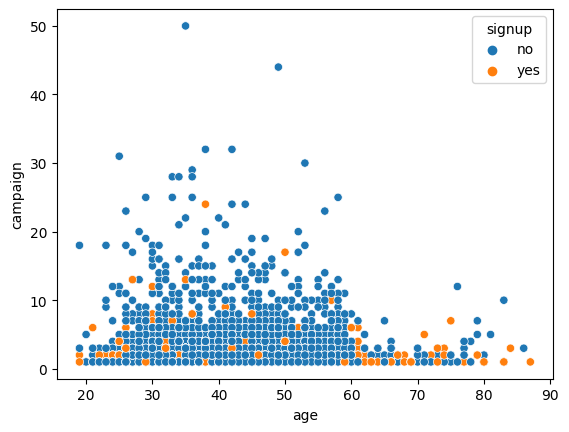

In [ ]:
sns.scatterplot(data=data, x="age", y="campaign", hue="signup")

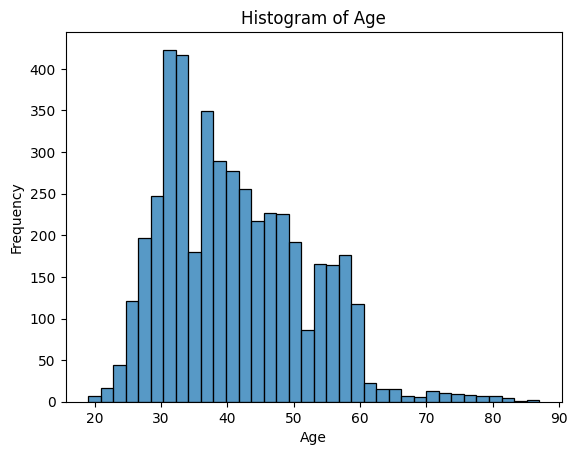

In [ ]:
sns.histplot(data=data, x="age")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='age', ylabel='pdays'>

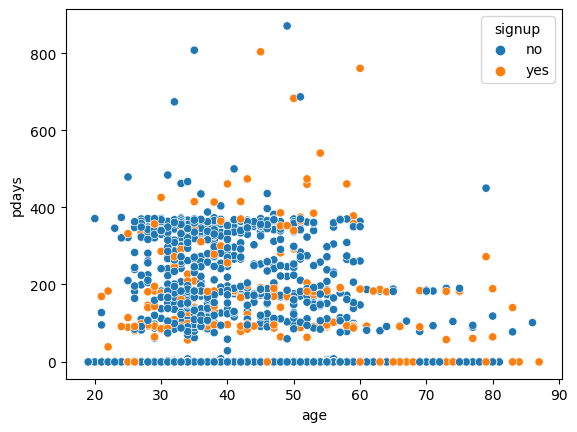

In [ ]:
sns.scatterplot(data=data, x="age", y="pdays", hue="signup")

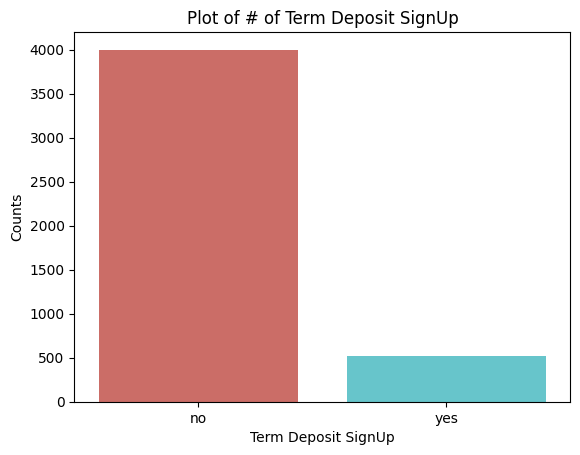

In [ ]:
sns.countplot(x='signup',data=data,palette='hls')

# Add labels
plt.title('Plot of # of Term Deposit SignUp')
plt.xlabel('Term Deposit SignUp')
plt.ylabel('Counts')
plt.show()

In [ ]:
data.groupby('signup').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum
signup,,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250,6.146750
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211,6.320537


In [ ]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum
job,,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351,6.002092
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658,5.674419
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571,6.648810
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143,6.705357
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020,6.568627
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304,6.278261
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164,6.398907
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645,5.908873
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286,5.940476


In [ ]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum
marital,,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394,6.240530
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128,6.257776
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977,5.921405


In [ ]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,monthnum
education,,,,,,,,
elementry,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,5.992625
high school,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,6.036427
university,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,6.506667
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,5.951872


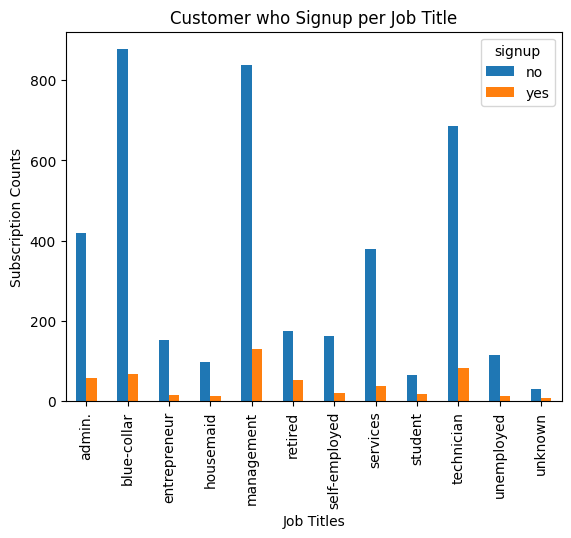

In [ ]:
pd.crosstab(data.job, data.signup).plot(kind='bar')
# Add labels
plt.title('Customer who Signup per Job Title')
plt.xlabel('Job Titles')
plt.ylabel('Subscription Counts')
plt.show()

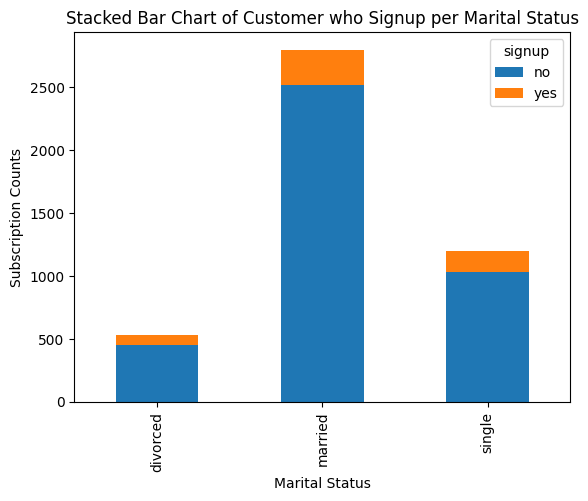

In [ ]:
pd.crosstab(data.marital, data.signup).plot(kind='bar', stacked='true')
# Add labels
plt.title('Stacked Bar Chart of Customer who Signup per Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Counts')
plt.show()

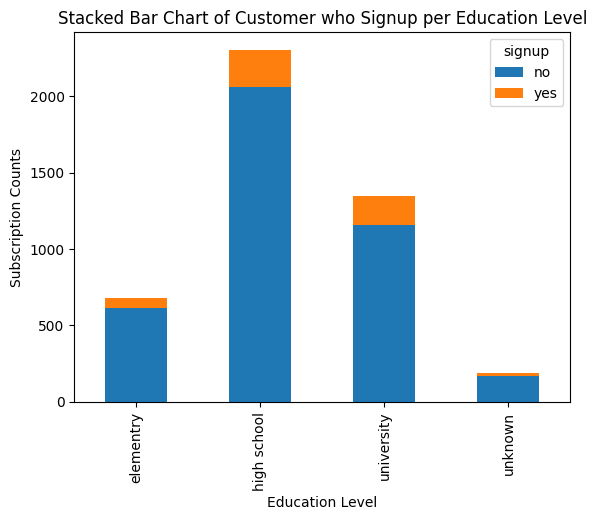

In [ ]:
pd.crosstab(data.education, data.signup).plot(kind='bar', stacked='true')
# Add labels
plt.title('Stacked Bar Chart of Customer who Signup per Education Level')
plt.xlabel('Education Level')
plt.ylabel('Subscription Counts')
plt.show()

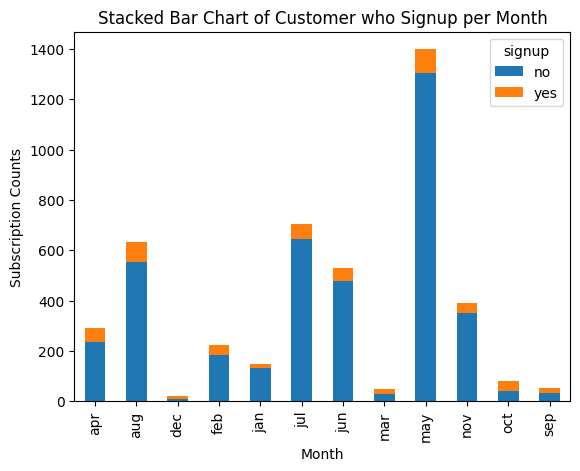

In [ ]:
pd.crosstab(data.month, data.signup).plot(kind='bar', stacked='true')
# Add labels
plt.title('Stacked Bar Chart of Customer who Signup per Month')
plt.xlabel('Month')
plt.ylabel('Subscription Counts')
plt.show()

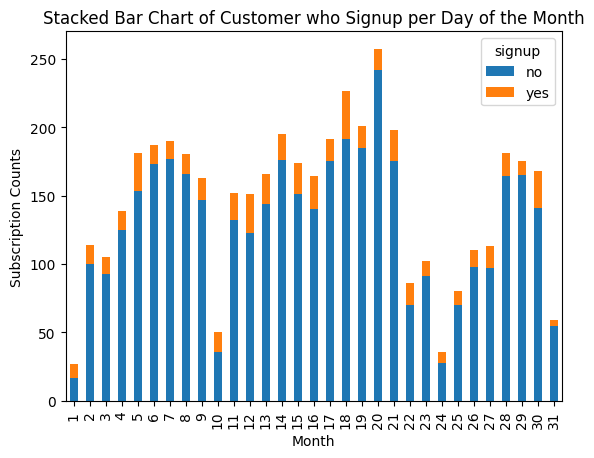

In [ ]:
pd.crosstab(data.day, data.signup).plot(kind='bar', stacked='true')
# Add labels
plt.title('Stacked Bar Chart of Customer who Signup per Day of the Month')
plt.xlabel('Month')
plt.ylabel('Subscription Counts')
plt.show()

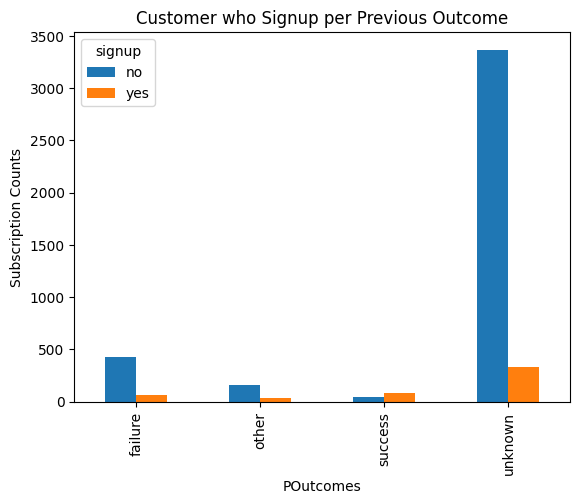

In [ ]:
pd.crosstab(data.poutcome, data.signup).plot(kind='bar')
# Add labels
plt.title('Customer who Signup per Previous Outcome')
plt.xlabel('POutcomes')
plt.ylabel('Subscription Counts')
plt.show()

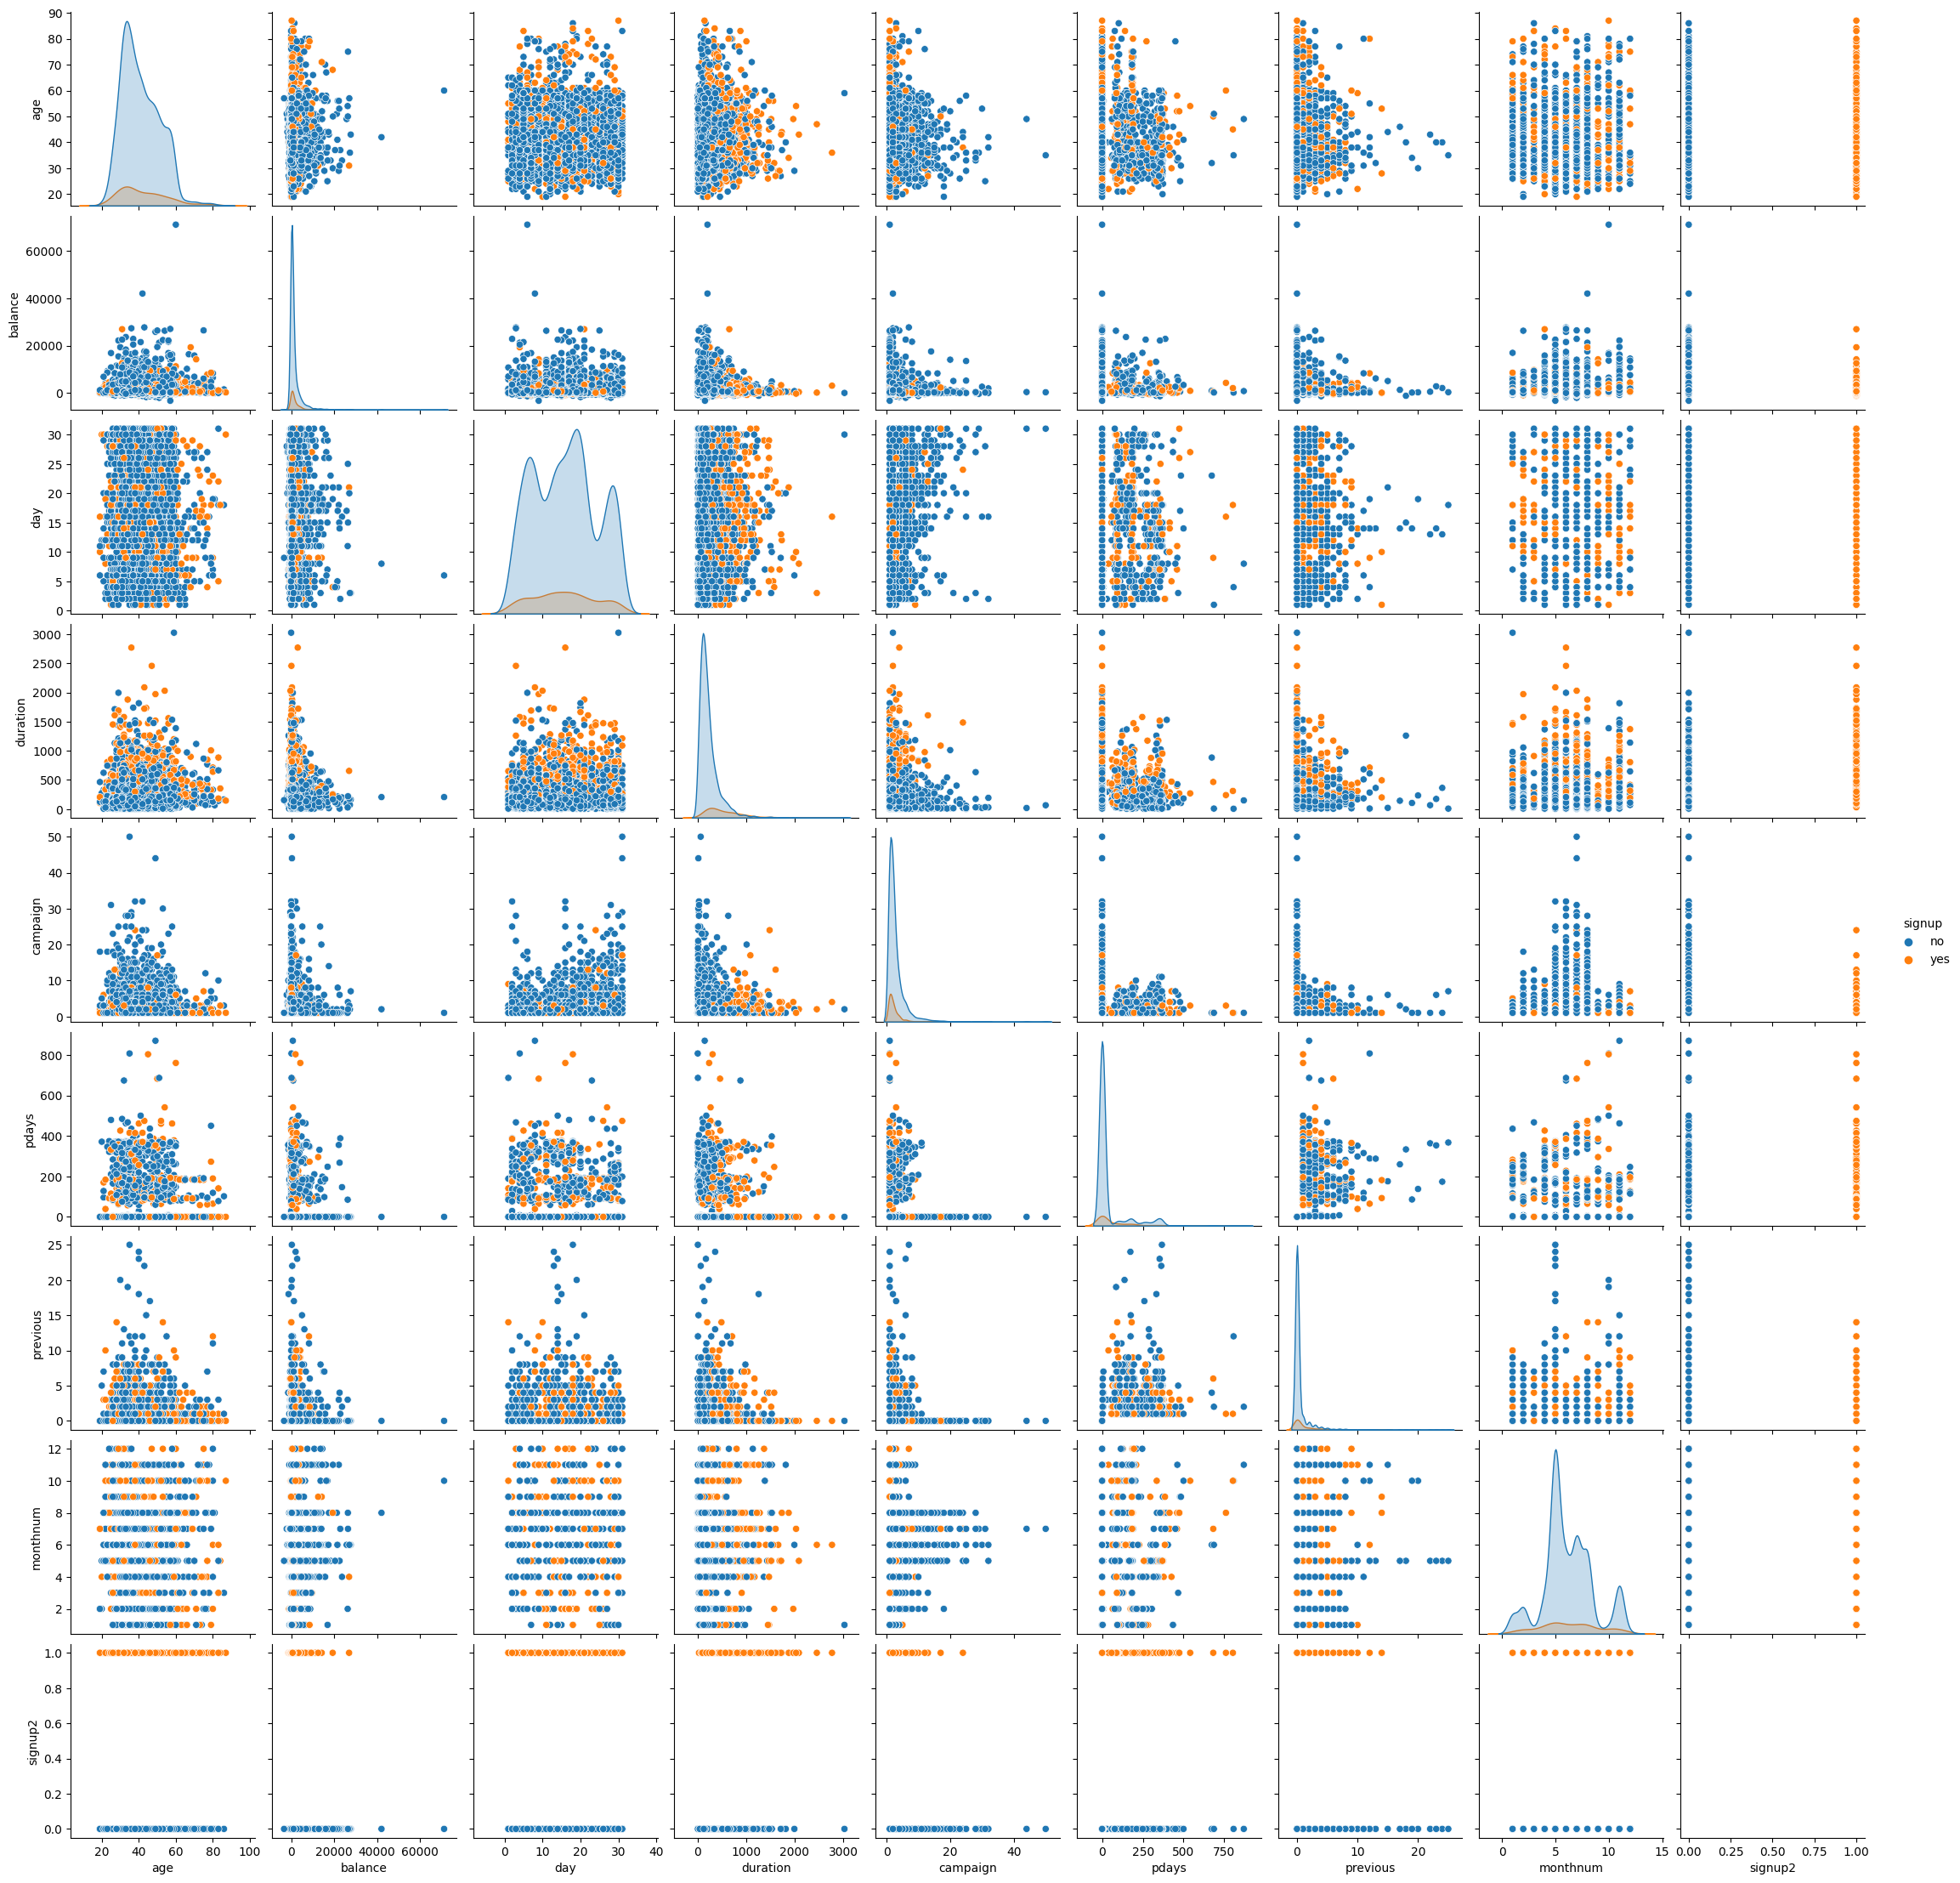

In [ ]:
sns.pairplot(data, hue='signup')
plt.show()

In [ ]:
params = {'max_depth': [2,3,4,5,6,7,8,9,10],
          'min_samples_split': [2,3,4],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [2,3,4]
          }

In [ ]:
numeric_features = ['duration','monthnum','day','campaign','pdays','previous']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['contact','poutcome']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
log_pipe = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('logreg', LogisticRegression())
    ]
)
log_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'monthnum',
                                                   'day', 'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['contact', 'poutcome'])])),
                ('logreg', LogisticRegression())])

In [ ]:
X=data.drop(columns=['signup', 'signup2','age', 'balance', 'job','marital','education',	'month','default','balance','housing','loan'])
y=data.signup2
X.head()

,contact,day,duration,campaign,pdays,previous,poutcome,monthnum
0,cellular,19,79,1,-1,0,unknown,10
1,cellular,11,220,1,339,4,failure,5
2,cellular,16,185,1,330,1,failure,4
3,unknown,3,199,4,-1,0,unknown,6
4,unknown,5,226,1,-1,0,unknown,5


In [ ]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

log_pipe.fit(X_train, y_train)
print("model score: %.3f" % log_pipe.score(X_test, y_test))

model score: 0.895


In [ ]:
results=cross_validate(log_pipe, X_train, y_train, return_train_score=True)
print(sorted(results.keys()))
results['test_score']

['fit_time', 'score_time', 'test_score', 'train_score']


array([0.89731438, 0.8878357 , 0.89889415, 0.92101106, 0.90348101])

In [ ]:
y_pred=log_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Answer check
print(f'Accuracy: {accuracy: .2f}\nPrecision: {precision: .2f}\nRecall: {recall: .2f}')

Accuracy:  0.89
Precision:  0.65
Recall:  0.32


In [ ]:
conf_matrix=confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[1161,   29],
       [ 114,   53]])

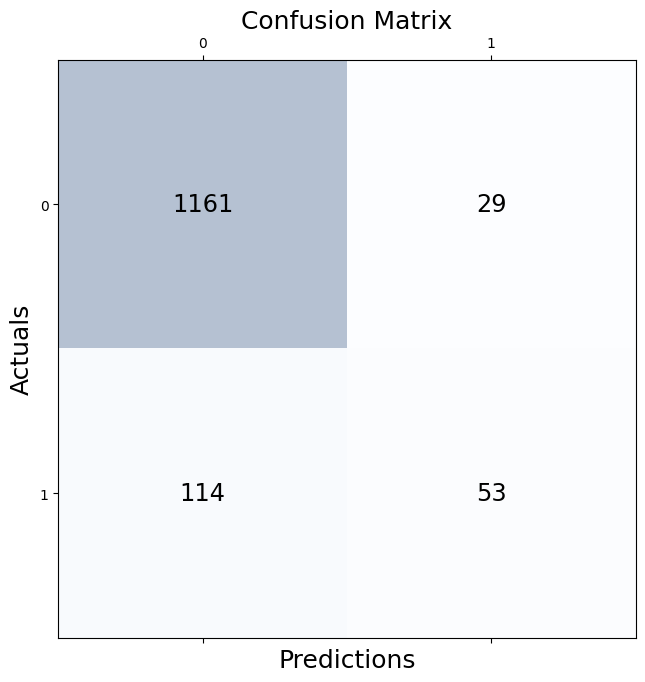

In [ ]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
roc_auc_score(y, log_pipe.predict_proba(X)[:,1])

0.8721067658349329

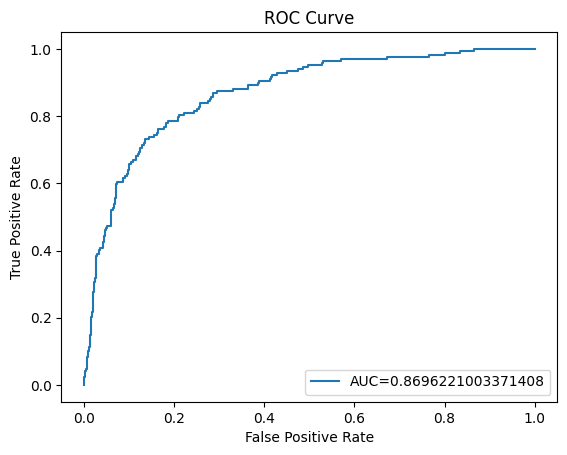

In [ ]:
y_pred_proba = log_pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

In [ ]:
# Combine feature names and coefficients into a dataframe
df_coef = pd.DataFrame({'feature': log_pipe[:-1].get_feature_names_out(), 'coef': log_pipe.named_steps['logreg'].coef_[0]})
df_coef.sort_values(by='coef', ascending=False, inplace=True)
# calculate the absolute value of the coefficients and sort
df_coef['abs_coef'] = df_coef['coef'].abs()
df_coef.sort_values(by='abs_coef', ascending=False, inplace=True)
df_coef

,feature,coef,abs_coef
11,cat__poutcome_success,1.725212,1.725212
0,num__duration,0.972551,0.972551
8,cat__contact_unknown,-0.911605,0.911605
12,cat__poutcome_unknown,-0.892723,0.892723
9,cat__poutcome_failure,-0.515783,0.515783
7,cat__contact_telephone,0.457524,0.457524
6,cat__contact_cellular,0.454306,0.454306
3,num__campaign,-0.337153,0.337153
10,cat__poutcome_other,-0.316481,0.316481
4,num__pdays,-0.075524,0.075524
